<h1>
Netflix Data: Cleaning, Analysis and Visualization project.</h1>

In [2]:
# Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h2>Load the CSV file and clean it up for analysis.</h2>

In [11]:
#Load the dataset from the CSV file
data = pd.read_csv('netflix1.csv')
# Display the first 5 rows to see what the data looks like
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
# Get a summary of the dataset (columns, data types, missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [13]:
# Convert 'date_added' column from text to a proper datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Check for the number of duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)

# Confirm the changes by checking the data types again
print("\nDataset Info after cleaning:")
data.info()

Number of duplicate rows: 0

Dataset Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


<h2>The next step is to start the Exploratory Data Analysis (EDA).</h2>

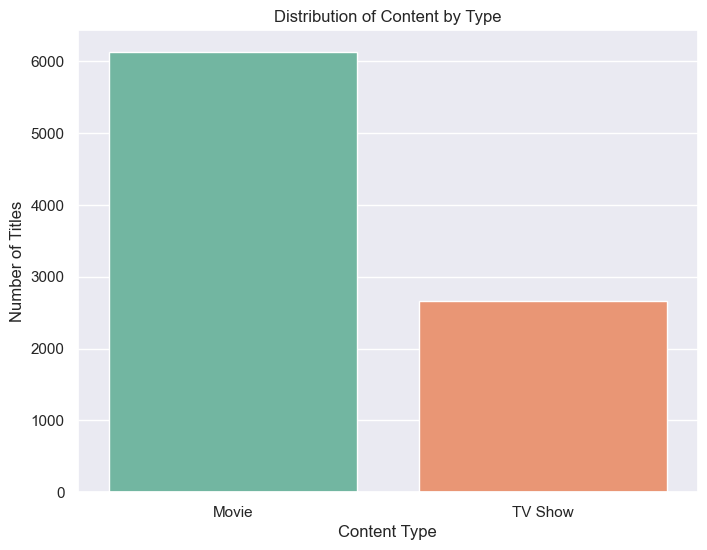

In [17]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a countplot to show the number of Movies vs. TV Shows
# Added hue='type' and legend=False to follow the new best practice
sns.countplot(x='type', data=data, hue='type', palette='Set2', legend=False)

# Add a title and labels for clarity
plt.title('Distribution of Content by Type')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')

# Display the plot
plt.show()

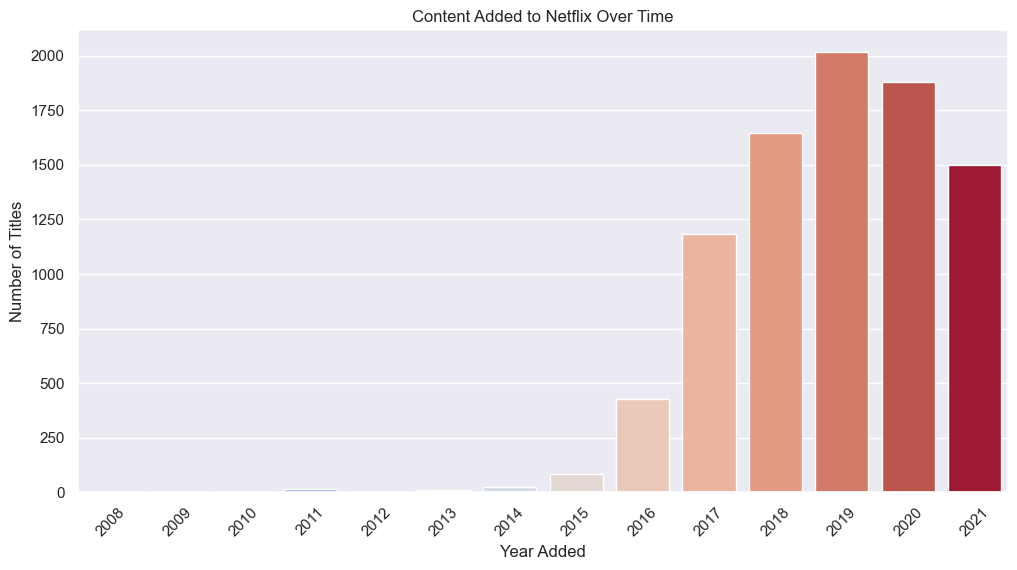

In [18]:
# Create a new column 'year_added' by extracting the year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Set the figure size for a wider plot
plt.figure(figsize=(12, 6))

# Create a countplot for content added each year
sns.countplot(x='year_added', data=data, hue='year_added', palette='coolwarm', legend=False)

# Add a title and labels
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

# Display the plot
plt.show()

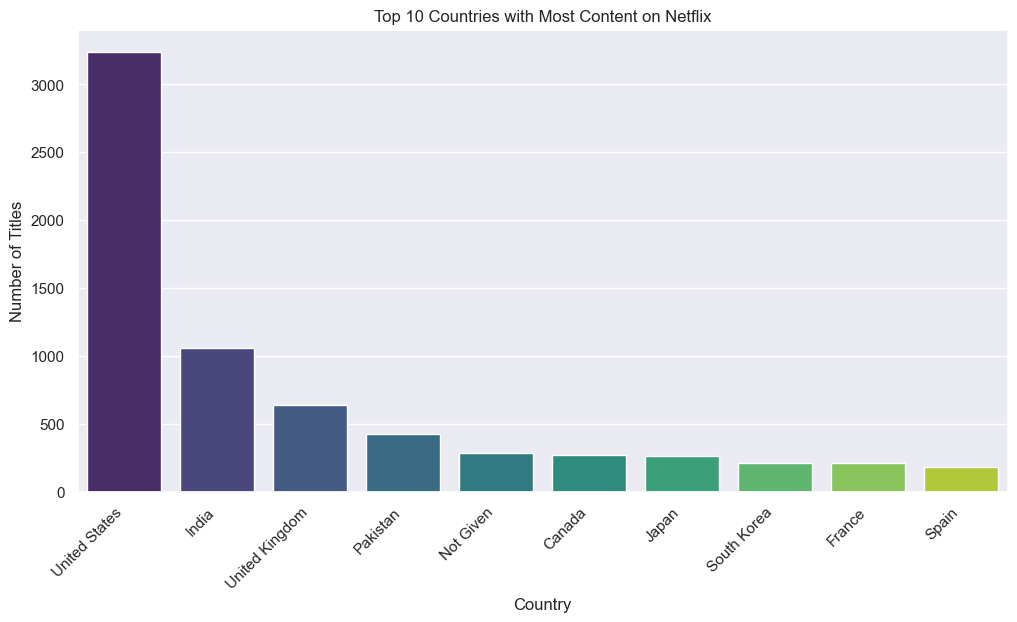

In [19]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Get the count of titles for each country and select the top 10
top_10_countries = data['country'].value_counts().head(10)

# Create a bar plot for the top 10 countries
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, hue=top_10_countries.index, palette='viridis', legend=False)

# Add a title and labels
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

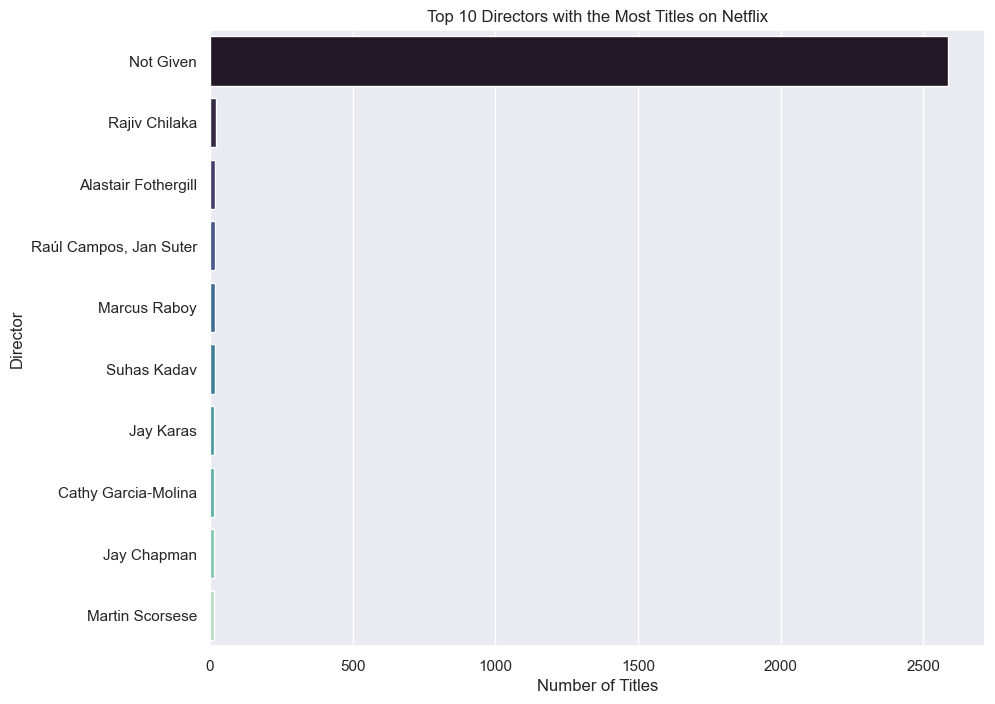

In [21]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Get the count of titles for each director and select the top 10
top_10_directors = data['director'].value_counts().head(10)

# Create a horizontal bar plot for the top 10 directors
# Added hue=top_10_directors.index and legend=False to follow the new best practice
sns.barplot(y=top_10_directors.index, x=top_10_directors.values, hue=top_10_directors.index, palette='mako', legend=False)

# Add a title and labels
plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

# Display the plot
plt.show()

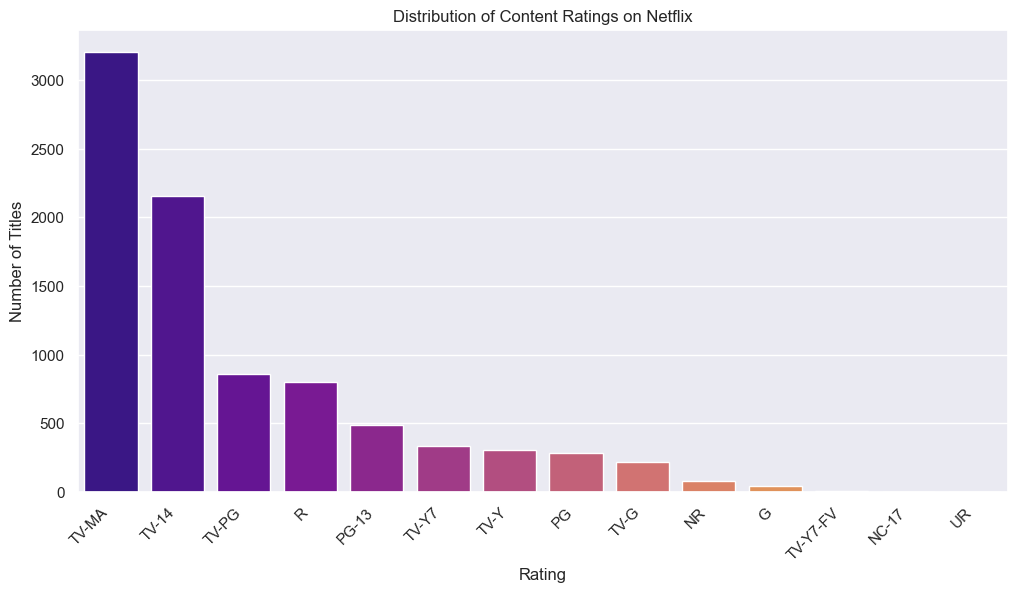

In [22]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Get the count of titles for each rating
ratings = data['rating'].value_counts()

# Create a bar plot for the content ratings
sns.barplot(x=ratings.index, y=ratings.values, hue=ratings.index, palette='plasma', legend=False)

# Add a title and labels
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

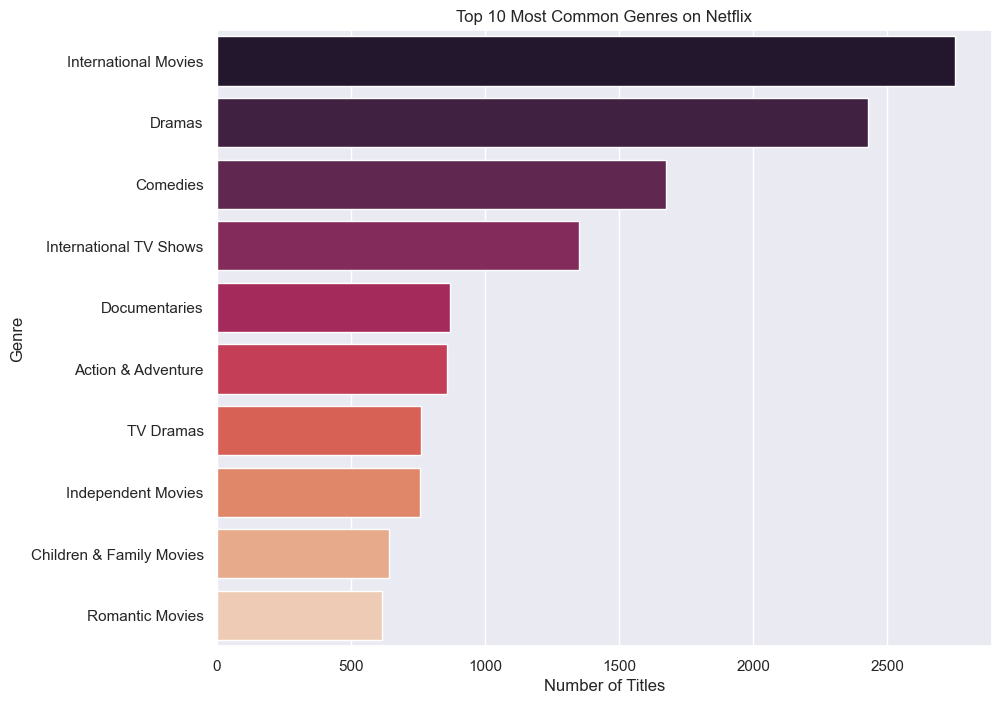

In [23]:
# Create a new pandas Series where each genre from 'listed_in' gets its own row
genres = data['listed_in'].str.split(', ').explode()

# Get the count of each genre and select the top 10
top_10_genres = genres.value_counts().head(10)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a horizontal bar plot for the top 10 genres
sns.barplot(y=top_10_genres.index, x=top_10_genres.values, hue=top_10_genres.index, palette='rocket', legend=False)

# Add a title and labels
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')

# Display the plot
plt.show()

<h4>Now we will do analysis based on this report; Check Netflix_Project_Report.docx files for detailed analysis</h4>

**Author**: *Nilay Saha*

**Date**: August 24, 2025